## 词云示例

![](./image/word_tag.png)

词云是很有说服力的一种可视化方式，尤其是对于文本中心内容展示，下面我们来学习一下，怎么去生成自己的文本上的词云。

## 引入相关的库包：

In [1]:
#coding:utf-8
__author__ = 'JimmyZhao'

import warnings
warnings.filterwarnings("ignore")
import jieba    #分词包
import numpy    #numpy计算包
import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包

## 导入娱乐新闻数据，分词：

In [2]:
df = pd.read_csv("./data/entertainment_news.csv", encoding='utf-8')
df = df.dropna()
content=df.content.values.tolist()
#jieba.load_userdict(u"data/user_dic.txt")
segment=[]
for line in content:
    try:
        segs=jieba.lcut(line)
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':
                segment.append(seg)
    except:
        print line
        continue

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.332 seconds.
Prefix dict has been built succesfully.


### 去停用词

In [4]:
words_df=pd.DataFrame({'segment':segment})
#words_df.head()
stopwords=pd.read_csv("data/stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
#stopwords.head()
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

### 统计词频

In [5]:
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
words_stat.head()

,segment,计数
60580,电影,10230
73034,观众,5574
8384,中国,5476
70250,节目,4398
33392,导演,4197


### 做词云

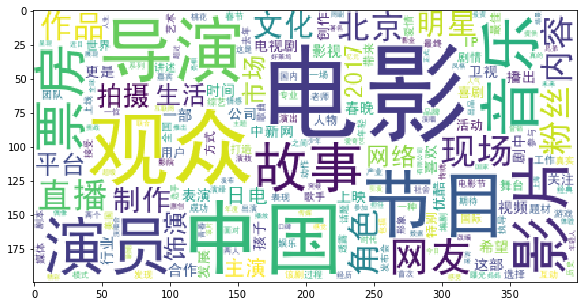

In [6]:
wordcloud=WordCloud(font_path="data/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

### 自定义背景图做词云

![](image/entertainment.jpeg)

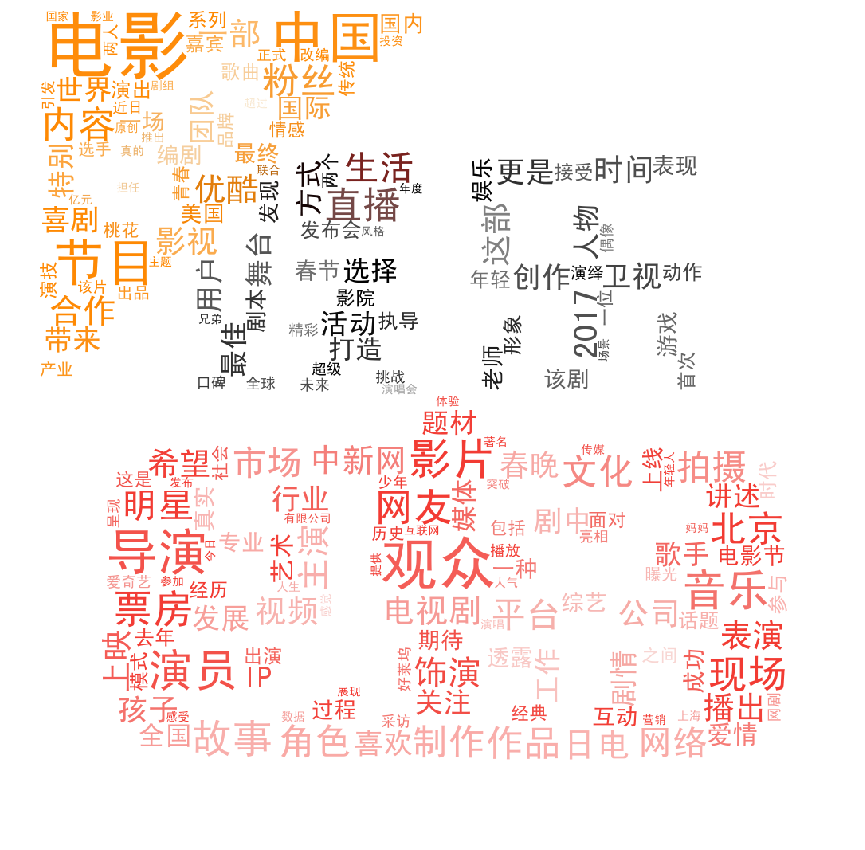

In [6]:
from scipy.misc import imread
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
from wordcloud import WordCloud,ImageColorGenerator
bimg=imread('image/entertainment.jpeg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='data/simhei.ttf',max_font_size=200)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))

## 体育新闻

In [7]:
df = pd.read_csv("./data/sports_news.csv", encoding='utf-8')
df = df.dropna()
content=df.content.values.tolist()
#jieba.load_userdict(u"data/user_dic.txt")
segment=[]
for line in content:
    try:
        segs=jieba.lcut(line)
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':
                segment.append(seg)
    except:
        print line
        continue

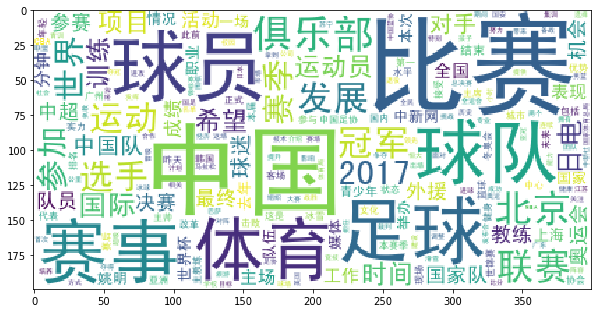

In [9]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
words_df=pd.DataFrame({'segment':segment})
#words_df.head()
stopwords=pd.read_csv("data/stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
#stopwords.head()
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
words_stat.head()
wordcloud=WordCloud(background_color="white",font_path="data/simhei.ttf",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

### 加入自定义图

![](image/sports.jpeg)

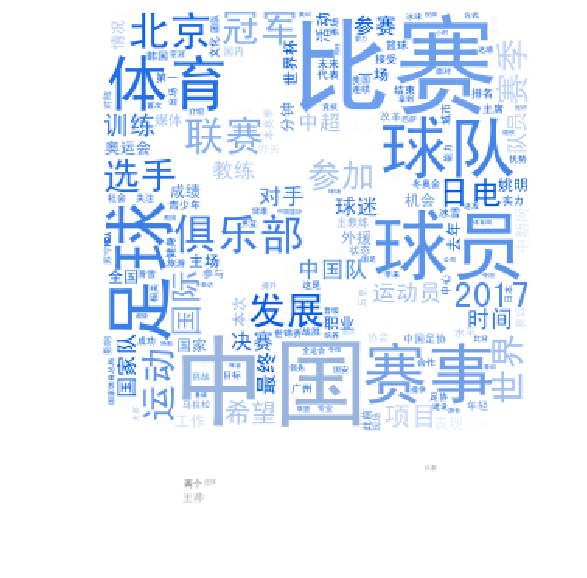

In [9]:
from scipy.misc import imread
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
from wordcloud import WordCloud,ImageColorGenerator
bimg=imread('image/sports.jpeg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='data/simhei.ttf',max_font_size=200)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))